# Abalone Dataset

Original goal: determine a linear relationship between listed features and age of organism.  Typically is determined by number of layers or "rings" in the shell, but this is cumbersome and obnoxious.

BRAINSTORMING

There's probably an excess of features.  PCA might be something to play with.  Hopefully there's a linear relationship going on someplace.  Can try linear or logistic regression for funzies.  Class variable is continuous.

According to Chris S: "I think that the abalone dataset will work for the project, but I would really stress that you focus on attempting different feature representations or trying transfer learning (part of deep learning that we haven’t talked about). Reason being that this is a well labeled and studied dataset, therefore you will have a good estimate of the error that you should expect."

...that sounds complicated.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('abalone.data')
df.columns = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings']

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
sex               4176 non-null object
length            4176 non-null float64
diameter          4176 non-null float64
height            4176 non-null float64
whole weight      4176 non-null float64
shucked weight    4176 non-null float64
viscera weight    4176 non-null float64
shell weight      4176 non-null float64
rings             4176 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.7+ KB


In [34]:
df.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


Need to identify outliers.  How about scale?  Forest models ignore scale.  Should explode Sex category into boolean columns?

Name / Data Type / Measurement Unit / Description 
----------------------------- 
Sex / nominal / -- / M, F, and I (infant) 

Length / continuous / mm / Longest shell measurement 

Diameter	/ continuous / mm / perpendicular to length 

Height / continuous / mm / with meat in shell 

Whole weight / continuous / grams / whole abalone 

Shucked weight / continuous	/ grams / weight of meat 

Viscera weight / continuous / grams / gut weight (after bleeding) 

Shell weight / continuous / grams / after being dried 

Rings / integer / -- / +1.5 gives the age in years 

In [35]:
#gives correlation matrix
df.corr()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


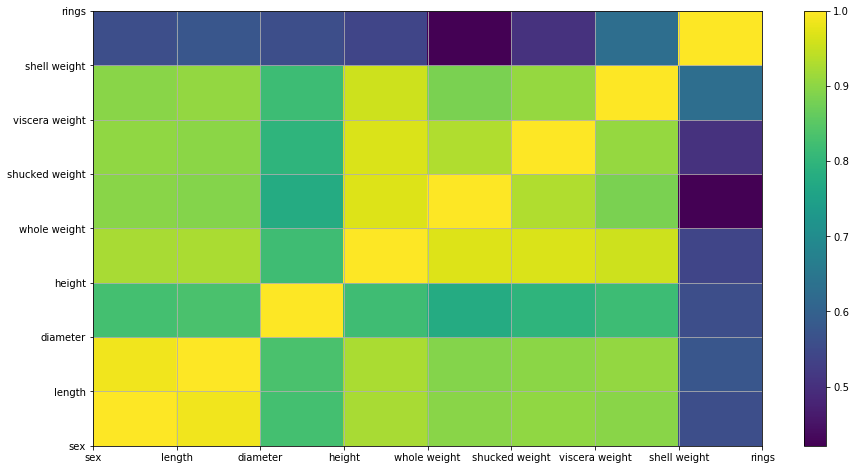

In [36]:
#visually examine correlation matrix

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
plt.pcolor(df.corr())
plt.colorbar()
labels = df.columns.tolist()
ax1.set_xticklabels(labels,fontsize=10)
ax1.set_yticklabels(labels,fontsize=10)
ax1.grid(True)


Highest correlation between rings and shell weight, which makes sense.  Otherwise, correlation between rings and other, invidivdual features is pretty poor.

Algorithms available to us:
K-nearest-neighbors, KMeans, Linear and Logistic regression, Trees, Feature reduction - PCA, isomap(NO.)

Which of these lend themselves to continuous variables?

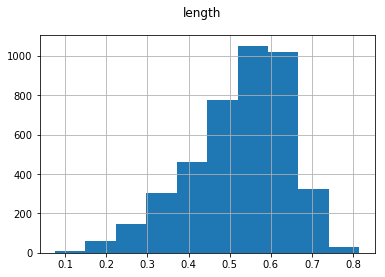

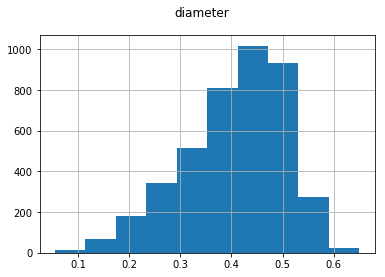

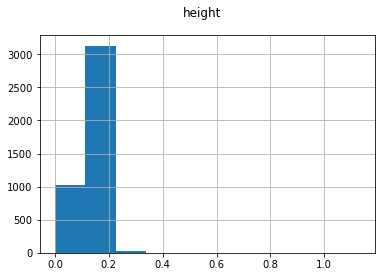

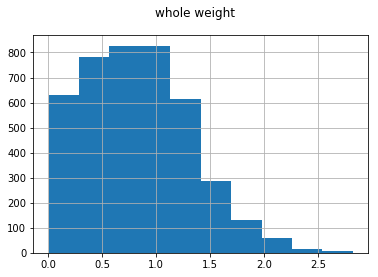

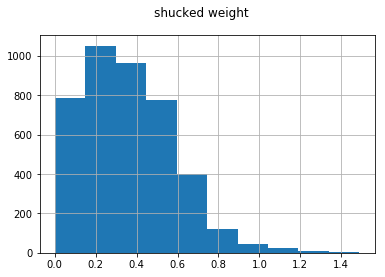

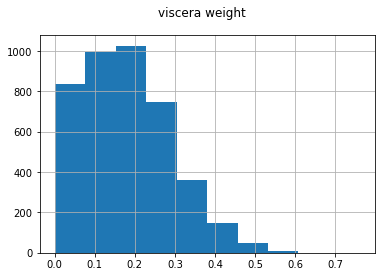

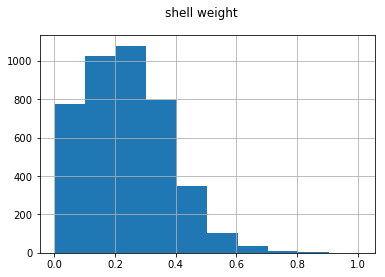

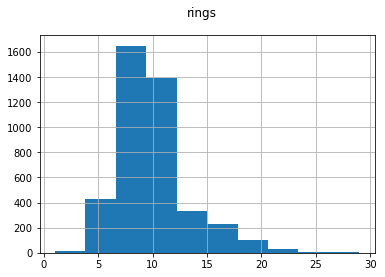

In [37]:
#histograms of numeric data

col = df.columns.tolist()
del col[0]

for column in col:
    df[column].hist()
    plt.suptitle(column)
    plt.show()

In [38]:
#category column
y = df['rings']
print(type(y))
age_range = np.sort(y.unique())
age_range

<class 'pandas.core.series.Series'>


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29], dtype=int64)

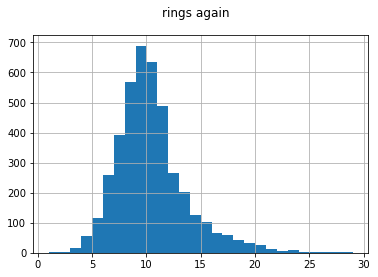

,rings
1,1
2,1
3,15
4,57
5,115
6,259
7,391
8,568
9,689
10,634


In [39]:
df['rings'].hist(bins = len(age_range))
plt.suptitle('rings again')
plt.show()

x = pd.DataFrame(df['rings'].value_counts())
x.sort_index()


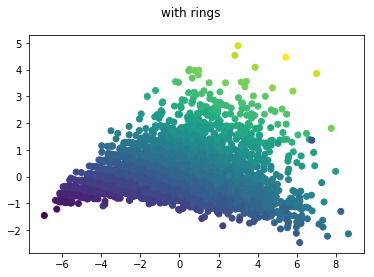

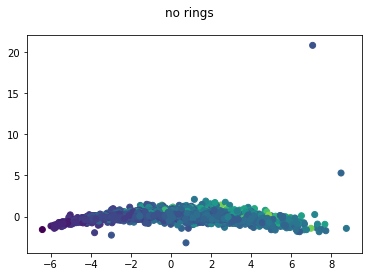

In [40]:
#experiments with PCA and Scaled data

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scale1 = df.drop(['sex'], axis=1)
scale2 = df.drop(['sex','rings'], axis=1)

#scaled
scale1 = StandardScaler().fit_transform(scale1)
scale2 = StandardScaler().fit_transform(scale2)

#PCA transform for 2D scatter
pca = PCA(n_components=2, svd_solver='full')

A = pca.fit(scale1).transform(scale1)
B = pca.fit(scale2).transform(scale2)

#plt them
A = pd.DataFrame(A)
B = pd.DataFrame(B)

plt.scatter(A[0],A[1], c=y)
plt.suptitle('with rings')
plt.show()

plt.scatter(B[0],B[1], c=y)
plt.suptitle('no rings')
plt.show()



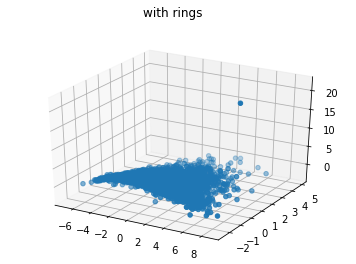

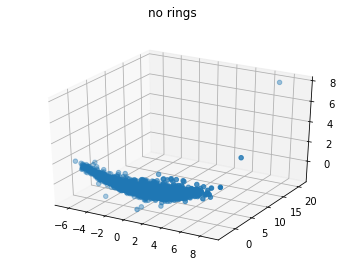

In [41]:
#what i did before but 3D

#PCA transform for 3D scatter
pca = PCA(n_components=3, svd_solver='full')

A3 = pca.fit(scale1).transform(scale1)
B3 = pca.fit(scale2).transform(scale2)

#plt them
A3 = pd.DataFrame(A3)
B3 = pd.DataFrame(B3)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
plt.suptitle('with rings')
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(A3[0], A3[1], A3[2])
plt.show()

fig = plt.figure()
plt.suptitle('no rings')
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(B3[0], B3[1], B3[2])
plt.show()

In [42]:
#get rid of outliers
A3.columns = ['x','y','z']
B3.columns = ['x','y','z']

col = ['x','y','z']

for i in col:
    print('with rings')
    print(A3[i].nlargest(5))
    print('no rings')
    print(B3[i].nlargest(5))

with rings
1762    8.638132
1416    8.252418
890     7.989980
2333    7.763534
1208    7.569050
Name: x, dtype: float64
no rings
1762    8.758513
1416    8.493866
1208    7.734781
890     7.687046
3714    7.495715
Name: x, dtype: float64
with rings
2208    4.901964
293     4.539073
479     4.467162
2200    4.091976
673     4.016269
Name: y, dtype: float64
no rings
2050    20.819608
1416     5.291963
505      2.088337
2176     1.878030
2178     1.735195
Name: y, dtype: float64
with rings
2050    21.744437
1416     6.035074
505      1.947348
2176     1.568951
2477     1.543176
Name: z, dtype: float64
no rings
2050    7.692571
1416    3.509889
1762    2.054967
235     1.840730
1144    1.799340
Name: z, dtype: float64


In [43]:
type(y)
y_s = pd.Series(y,name = 'rings')

A3.columns = ['x','y','z']
B3.columns = ['x','y','z']

print(A3.shape)

A3 = pd.concat([A3,y_s], axis=1)
B3 = pd.concat([B3,y_s], axis=1)

print(A3.shape)

A3.drop(A3['z'].idxmax(), axis=0, inplace=True)
A3.drop(A3['z'].idxmax(), axis=0, inplace=True)
B3.drop(B3['y'].idxmax(),axis=0, inplace=True)
B3.drop(B3['y'].idxmax(),axis=0, inplace=True)

print(A3.shape)

(4176, 3)
(4176, 4)
(4174, 4)


In [47]:
A3.head(5)

,x,y,z,rings
0,-3.483808,-0.092029,-0.063352,7
1,-0.536489,-0.048832,0.229168,9
2,-1.458203,0.419349,0.127569,10
3,-3.767037,-0.065034,-0.236180,7
4,-2.608167,0.024552,-0.183734,8


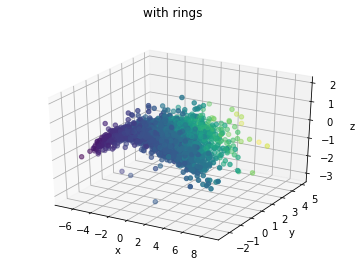

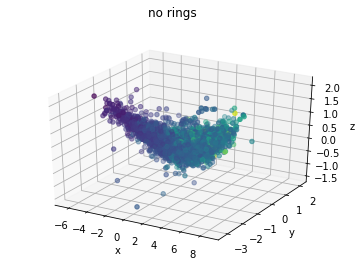

In [48]:
#remove outliers from no_ringY and with_ringZ
#A New Toy
#df.drop(df['col_name'].idxmax())

import matplotlib.cm as cm

fig = plt.figure()
plt.suptitle('with rings')
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(A3['x'], A3['y'], A3['z'], c=A3['rings'])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

fig = plt.figure()
plt.suptitle('no rings')
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(B3['x'], B3['y'], B3['z'], c=B3['rings'])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()